In [1]:
import os

os.environ["http_proxy"] = "http://proxy50.adm.toyota.co.jp:15520"
os.environ["https_proxy"] = "http://proxy50.adm.toyota.co.jp:15520"

In [2]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

In [3]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

#safety checker外す
def null_safety(images, **kwargs):
    return images, False
 
pipe.safety_checker = null_safety

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [4]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


def read_image(path):
    return PIL.Image.open(path).convert("RGB")

In [5]:
image = read_image("./image/image.png")
mask_image = read_image("./image/mask2.png")

In [6]:
prompt = "tesla car"
guidance_scale=7.5
num_samples = 2
generator = torch.Generator(device="cuda").manual_seed(10) # change the seed to get different results

from torch import autocast
with autocast("cuda"):
    images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
    ).images

# insert initial image in the list so we can compare side by side
images.insert(0, image)
image_grid(images, 1, num_samples + 1)

  0%|          | 0/50 [00:00<?, ?it/s]

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ /tmp/ipykernel_18345/3596500475.py:8 in <cell line: 7>                                    │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_18345/3596500475.py'                 │
│                                                                                           │
│ /user_vol/home/satoshi_kitai/.local/lib/python3.9/site-packages/torch/autograd/grad_mode. │
│ py:27 in decorate_context                                                                 │
│                                                                                           │
│    24 │   │   @functools.wraps(func)                                                      │
│    25 │   │   def decorate_context(*args, **kwargs):                                      │
│    26 │   │   │   with self.clone():                                                      │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                        │
│    28 │   │   return cast(F, decorate_context)                                            │
│    29 │                                                                                   │
│    30 │   def _wrap_generator(self, func):                                                │
│                                                                                           │
│ /user_vol/home/satoshi_kitai/.local/lib/python3.9/site-packages/diffusers/pipelines/stabl │
│ e_diffusion/pipeline_stable_diffusion_inpaint.py:429 in __call__                          │
│                                                                                           │
│   426 │   │   │   latent_model_input = self.scheduler.scale_model_input(latent_model_inpu │
│   427 │   │   │                                                                           │
│   428 │   │   │   # predict the noise residual                                            │
│ ❱ 429 │   │   │   noise_pred = self.unet(latent_model_input, t, encoder_hidden_states=tex │
│   430 │   │   │                                                                           │
│   431 │   │   │   # perform guidance                                                      │
│   432 │   │   │   if do_classifier_free_guidance:                                         │
│                                                                                           │
│ /user_vol/home/satoshi_kitai/.local/lib/python3.9/site-packages/torch/nn/modules/module.p │
│ y:1130 in _call_impl                                                                      │
│                                                                                           │
│   1127 │   │   # this function, and just call forward.                                    │
│   1128 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_h │
│   1129 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):            │
│ ❱ 1130 │   │   │   return forward_call(*input, **kwargs)                                  │
│   1131 │   │   # Do not call functions when jit is used                                   │
│   1132 │   │   full_backward_hooks, non_full_backward_hooks = [], []                      │
│   1133 │   │   if self._backward_hooks or _global_backward_hooks:                         │
│                                                                                           │
│ /user_vol/home/satoshi_kitai/.local/lib/python3.9/site-packages/diffusers/models/unet_2d_ │
│ condition.py:307 in forward                                                               │
│                                                                                           │
│   304 │   │   down_block_res_samples = (sample,)                                          │
│   305 │   │   for downsample_block in self.down_bl

  0%|          | 0/50 [00:00<?, ?it/s]

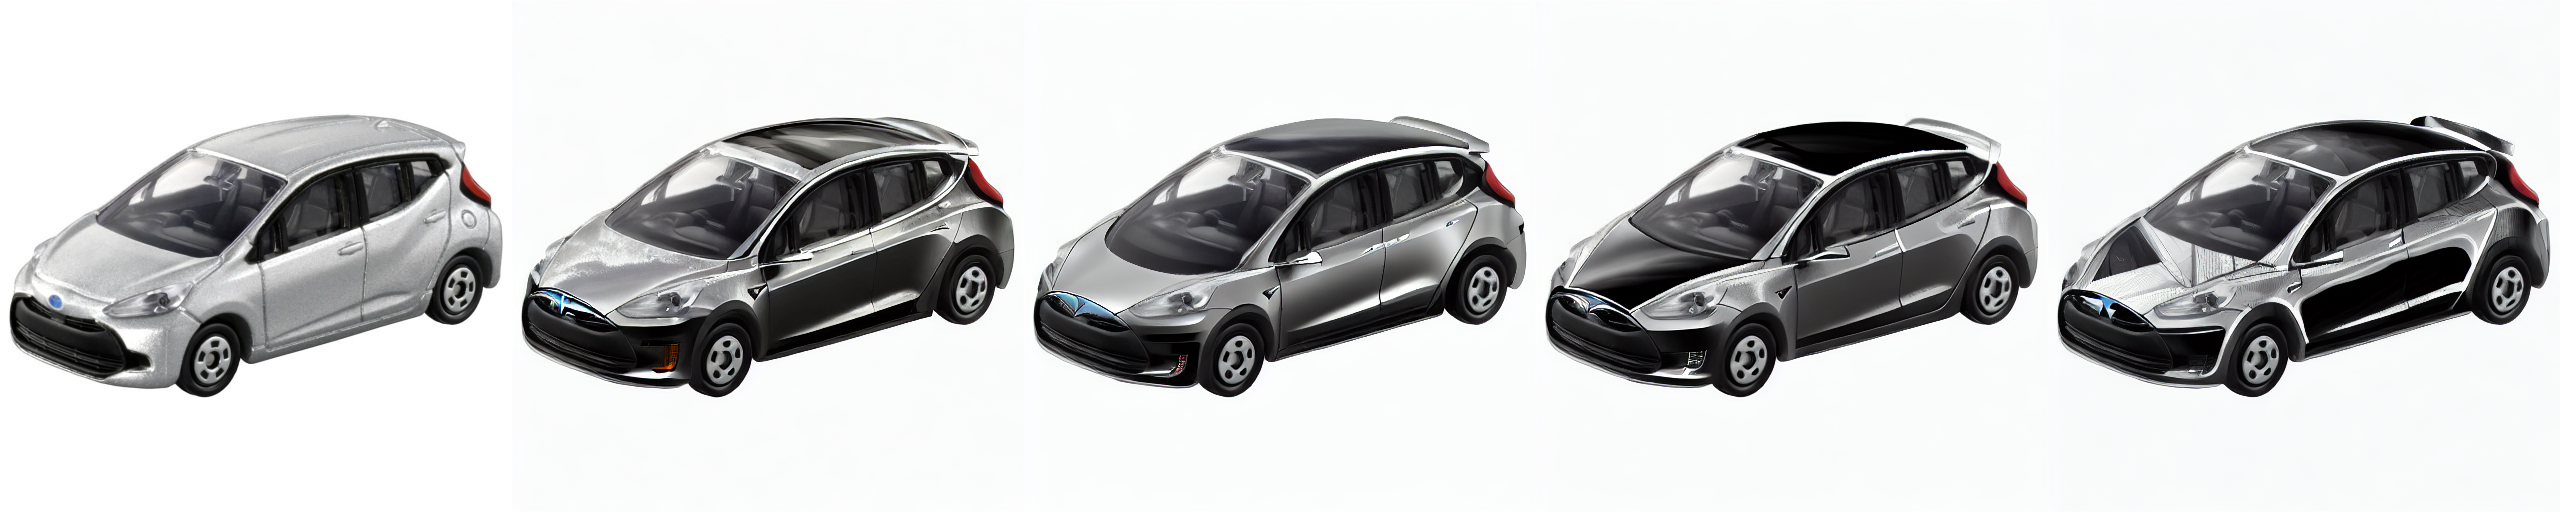

In [19]:
prompt = "tesla car"
guidance_scale=7.5
num_samples = 4
generator = torch.Generator(device="cuda").manual_seed(10) # change the seed to get different results

from torch import autocast
with autocast("cuda"):
    images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
    ).images

# insert initial image in the list so we can compare side by side
images.insert(0, image)
image_grid(images, 1, num_samples + 1)